In [1]:
# Import Required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import GridSearchCV

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings("ignore")

# set columns width and number of columns
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [2]:
#Data Understand
# Load data from csv
data_house = pd.read_csv("train.csv")
data_house.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,GLQ,851,Unf,0,140,991,Gas

In [3]:
#Check all columns 
data_house.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
  

In [4]:
data_house.shape

(1460, 81)

In [5]:
#model description
data_house.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
data_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
data_house['Alley'].isnull().value_counts()

True     1369
False      91
Name: Alley, dtype: int64

In [8]:
data_house.isnull().sum()[data_house.isnull().sum()>0]

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [9]:
#Drop Alley  ,PoolQC,Fence,MiscFeature columns because of null values

data_house=data_house.drop(columns=['Alley','PoolQC','Fence','MiscFeature'])

In [10]:
data_house.isnull().sum()[data_house.isnull().sum()>0]

LotFrontage     259
MasVnrType        8
MasVnrArea        8
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinType2     38
Electrical        1
FireplaceQu     690
GarageType       81
GarageYrBlt      81
GarageFinish     81
GarageQual       81
GarageCond       81
dtype: int64

In [11]:
#Fill LotFrontage, MasVnrArea, with median       
LotFrontage_median = data_house.LotFrontage.median()
data_house.LotFrontage = data_house.LotFrontage.fillna(LotFrontage_median)
data_house.MasVnrArea = data_house.MasVnrArea.fillna(data_house.MasVnrArea.median()) 

In [12]:
data_house.isnull().sum()[data_house.isnull().sum()>0]

MasVnrType        8
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinType2     38
Electrical        1
FireplaceQu     690
GarageType       81
GarageYrBlt      81
GarageFinish     81
GarageQual       81
GarageCond       81
dtype: int64

In [13]:
# Fill NA
cols = ['FireplaceQu', 'BsmtQual', 'BsmtCond', 'BsmtFinType1','BsmtFinType2','GarageType','GarageFinish','GarageQual','GarageCond']
data_house[cols]=data_house[cols].fillna('NA')

In [14]:
data_house.isnull().sum()[data_house.isnull().sum()>0]

MasVnrType       8
BsmtExposure    38
Electrical       1
GarageYrBlt     81
dtype: int64

In [15]:
data_house.Electrical = data_house.Electrical.fillna(data_house.Electrical.mode()[0])  

In [16]:
data_house.GarageYrBlt = data_house.GarageYrBlt.fillna(0)

In [17]:
data_house.BsmtExposure = data_house.BsmtExposure.fillna('No')

In [18]:
data_house.isnull().sum()[data_house.isnull().sum()>0]

MasVnrType    8
dtype: int64

In [19]:
data_house.MasVnrType = data_house.MasVnrType.fillna('None')

In [20]:
data_house.isnull().sum()[data_house.isnull().sum()>0]

Series([], dtype: int64)

In [21]:
# Convert into numbers
data_house = data_house.replace({'ExterQual':{'Po':1,'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}})
data_house = data_house.replace({'BsmtQual':{'NA':0,'Po':1,'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}})
data_house = data_house.replace({'BsmtExposure':{'NA':0, 'No':1,'Mn':2, 'Av':3, 'Gd':4}})
data_house = data_house.replace({'BsmtFinType1':{'NA':0,'Unf':1,'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6}})
data_house = data_house.replace({'HeatingQC':{'Po':1,'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}})
data_house = data_house.replace({'KitchenQual':{'Po':1,'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}})
data_house = data_house.replace({'FireplaceQu':{'NA':0,'Po':1,'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}})


In [22]:
# Create new column HouseAge
data_house['HouseAge'] = data_house.YrSold - data_house.YearBuilt
data_house=data_house.drop(columns=['YrSold', 'YearBuilt'])
convert_dict = {'MSSubClass':object}
data_house = data_house.astype(convert_dict)

In [23]:
for c in data_house.columns:
    if data_house[c].dtype == np.object :
        print(c)
        print(data_house[c].value_counts(normalize=True))

MSSubClass
20     0.367123
60     0.204795
50     0.098630
120    0.059589
30     0.047260
160    0.043151
70     0.041096
80     0.039726
90     0.035616
190    0.020548
85     0.013699
75     0.010959
45     0.008219
180    0.006849
40     0.002740
Name: MSSubClass, dtype: float64
MSZoning
RL         0.788356
RM         0.149315
FV         0.044521
RH         0.010959
C (all)    0.006849
Name: MSZoning, dtype: float64
Street
Pave    0.99589
Grvl    0.00411
Name: Street, dtype: float64
LotShape
Reg    0.633562
IR1    0.331507
IR2    0.028082
IR3    0.006849
Name: LotShape, dtype: float64
LandContour
Lvl    0.897945
Bnk    0.043151
HLS    0.034247
Low    0.024658
Name: LandContour, dtype: float64
Utilities
AllPub    0.999315
NoSeWa    0.000685
Name: Utilities, dtype: float64
LotConfig
Inside     0.720548
Corner     0.180137
CulDSac    0.064384
FR2        0.032192
FR3        0.002740
Name: LotConfig, dtype: float64
LandSlope
Gtl    0.946575
Mod    0.044521
Sev    0.008904
Name: LandSlop

In [24]:
#Drop columns which have moe than 80% bias data
data_house=data_house.drop(columns=['Id','Street', 'LandContour', 'Utilities', 'LandSlope', 'Condition2', 'RoofMatl', 'BsmtCond'
                                    ,'Heating', 'CentralAir', 'Electrical', 'Functional', 'GarageQual', 'GarageCond'
                                    , 'PavedDrive', 'Condition1', 'BldgType', 'ExterCond', 'BsmtFinType2', 'SaleType'
                                    , 'SaleCondition'])

In [25]:
data_house.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'LotShape', 'LotConfig', 'Neighborhood', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearRemodAdd', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'Foundation', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'SalePrice', 'HouseAge'], dtype='object')

In [26]:
numeric_feats = data_house.dtypes[data_house.dtypes != "object"].index
numeric_feats

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearRemodAdd', 'MasVnrArea', 'ExterQual', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces', 'FireplaceQu', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'SalePrice', 'HouseAge'], dtype='object')

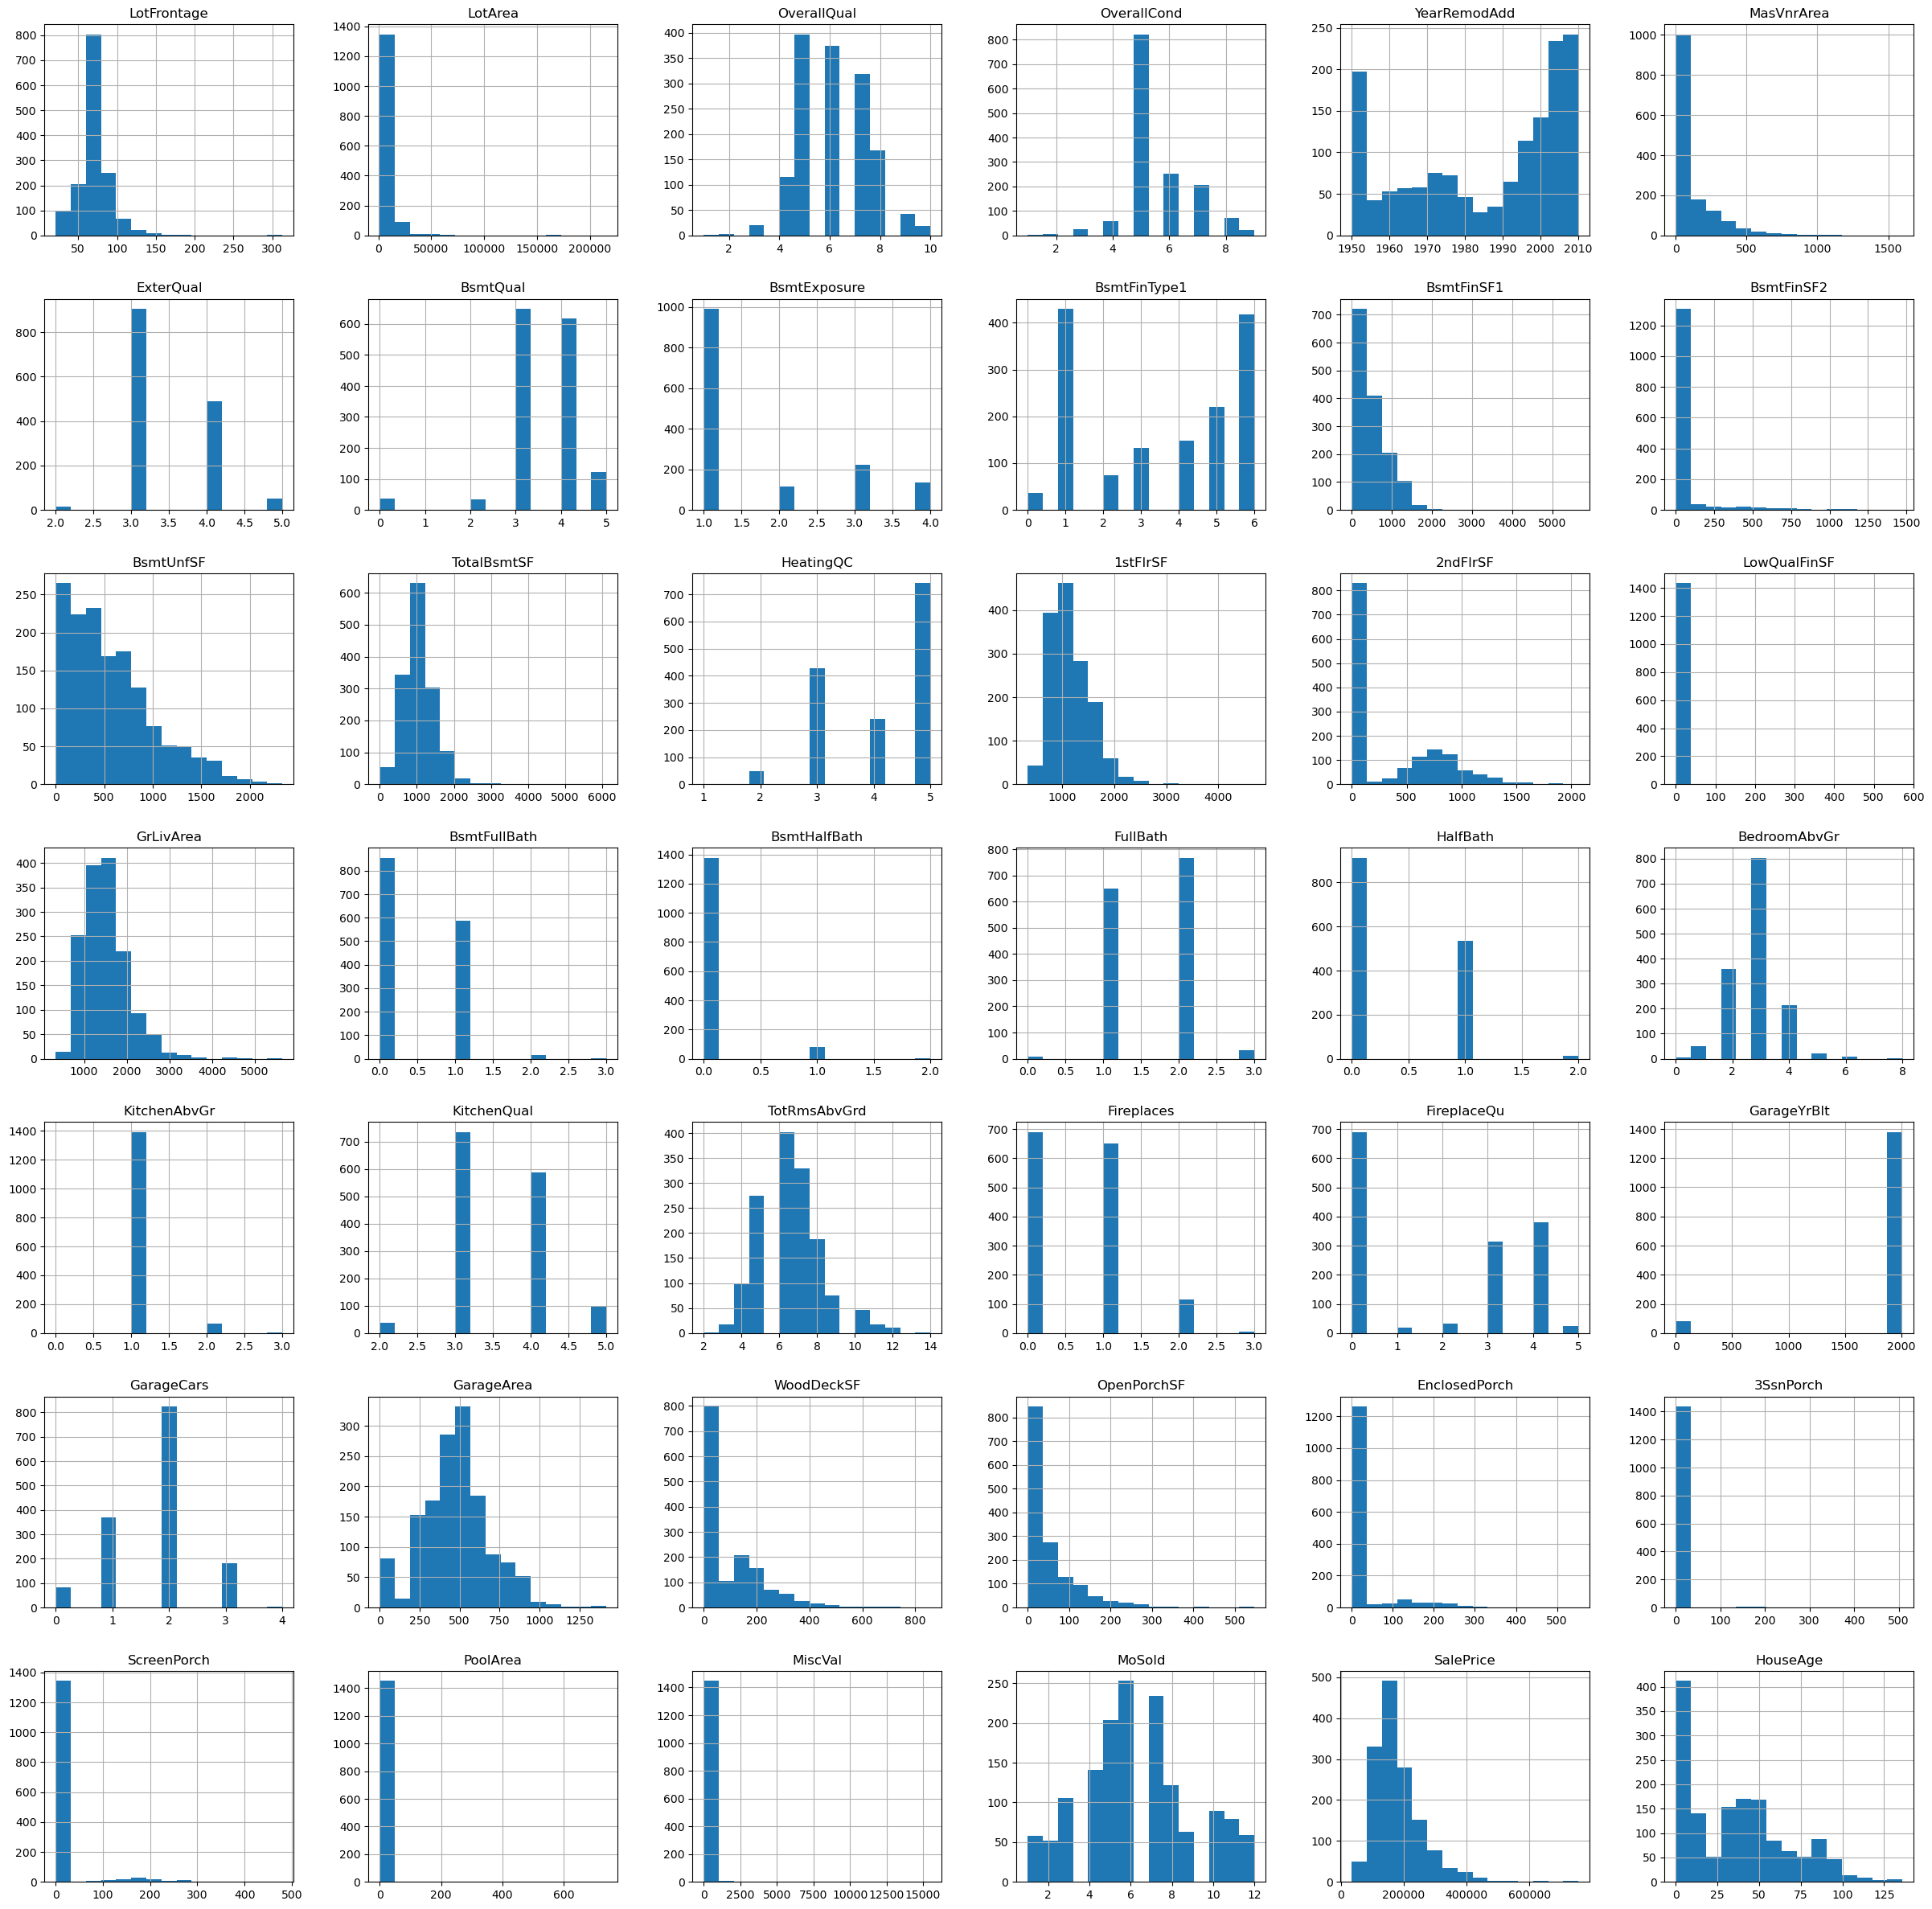

In [27]:
data_house[numeric_feats].hist(bins=15, figsize=(30, 30))
plt.show()

In [28]:
cor = data_house.corr()
cor

,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,ExterQual,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge
LotFrontage,1.000000,0.304522,0.234812,-0.053281,0.083348,0.178469,0.165567,0.141836,0.161535,0.072566,0.214367,0.042463,0.124098,0.363472,0.090051,0.413773,0.072388,0.037469,0.368007,0.090343,-0.006979,0.180534,0.047222,0.236840,-0.004905,0.169829,0.320518,0.233221,0.224425,0.099196,0.269539,0.323511,0.075542,0.137014,0.010287,0.061945,0.037655,0.180819,-0.000255,0.010451,0.334771,-0.116223
LotArea,0.304522,1.000000,0.105806,-0.005636,0.013788,0.103321,0.055570,0.072336,0.232300,0.058995,0.214103,0.111170,-0.002618,0.260833,0.003581,0.299475,0.050986,0.004779,0.263116,0.158155,0.048046,0.126031,0.014259,0.119690,-0.017784,0.067864,0.190015,0.271364,0.185332,0.072599,0.154871,0.180403,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,0.263843,-0.014832
OverallQual,0.234812,0.105806,1.000000,-0.091932,0.550684,0.407252,0.726278,0.629379,0.273214,0.232503,0.239666,-0.059119,0.308159,0.537808,0.457083,0.476224,0.295493,-0.030429,0.593007,0.111098,-0.040150,0.550600,0.273458,0.101676,-0.183882,0.673331,0.427452,0.396765,0.490788,0.288998,0.600671,0.562022,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,0.790982,-0.572629
OverallCond,-0.053281,-0.005636,-0.091932,1.000000,0.073741,-0.125694,-0.138942,-0.164996,-0.071234,-0.014479,-0.046231,0.040229,-0.136841,-0.171098,-0.014105,-0.144203,0.028942,0.025494,-0.079686,-0.054942,0.117821,-0.194149,-0.060769,0.012980,-0.087001,-0.026707,-0.057583,-0.023820,-0.056899,-0.006515,-0.185758,-0.151521,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,-0.077856,0.377325
YearRemodAdd,0.083348,0.013788,0.550684,0.073741,1.000000,0.176529,0.587318,0.515013,0.207239,0.224383,0.128451,-0.067759,0.181133,0.291066,0.550017,0.240379,0.140024,-0.062419,0.287389,0.119470,-0.012337,0.439046,0.183331,-0.040581,-0.149598,0.625316,0.191740,0.112581,0.196103,0.146357,0.420622,0.371600,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.507101,-0.590360
MasVnrArea,0.178469,0.103321,0.407252,-0.125694,0.176529,1.000000,0.345329,0.277490,0.170964,0.184728,0.261256,-0.071330,0.113862,0.360067,0.157130,0.339850,0.173800,-0.068628,0.388052,0.083010,0.027403,0.272999,0.199108,0.102775,-0.038450,0.282620,0.279568,0.247015,0.274950,0.132696,0.361945,0.370884,0.159991,0.122528,-0.109907,0.019144,0.062248,0.011928,-0.029512,-0.006723,0.472614,-0.311479
ExterQual,0.165567,0.055570,0.726278,-0.138942,0.587318,0.345329,1.000000,0.565558,0.238598,0.226197,0.203777,-0.076236,0.284705,0.470580,0.520027,0.397835,0.179530,-0.063062,0.435986,0.124550,-0.056261,0.483949,0.193892,-0.018729,-0.151236,0.716122,0.297903,0.249335,0.361798,0.228113,0.526390,0.495778,0.207932,0.291553,-0.149589,0.036934,0.012688,0.034766,-0.039310,0.042790,0.682639,-0.597522
BsmtQual,0.141836,0.072336,0.629379,-0.164996,0.515013,0.277490,0.565558,1.000000,0.313437,0.377398,0.304607,-0.030991,0.257158,0.564299,0.397169,0.293598,0.140987,-0.055775,0.327956,0.223495,-0.013362,0.371243,0.229561,-0.039913,-0.277731,0.510938,0.185846,0.229635,0.307337,0.187690,0.449194,0.406109,0.252703,0.253999,-0.181533,0.008097,0.034396,0.026415,-0.044404,0.015662,0.585207,-0.602798
BsmtExposure,0.161535,0.232300,0.273214,-0.071234,0.207239,0.170964,0.238598,0.313437,1.000000,0.315449,0.354776,0.090001,-0.066744,0.334711,0.136039,0.309151,-0.117929,-0.061846,0.123748,0.327340,0.074267,0.104958,-0.053509,-0.119704,-0.082680,0.243309,0.025541,0.178779,0.158562,0.058877,0.248101,0.250974,0.241463,0.077725,-0.097883,-0.0151

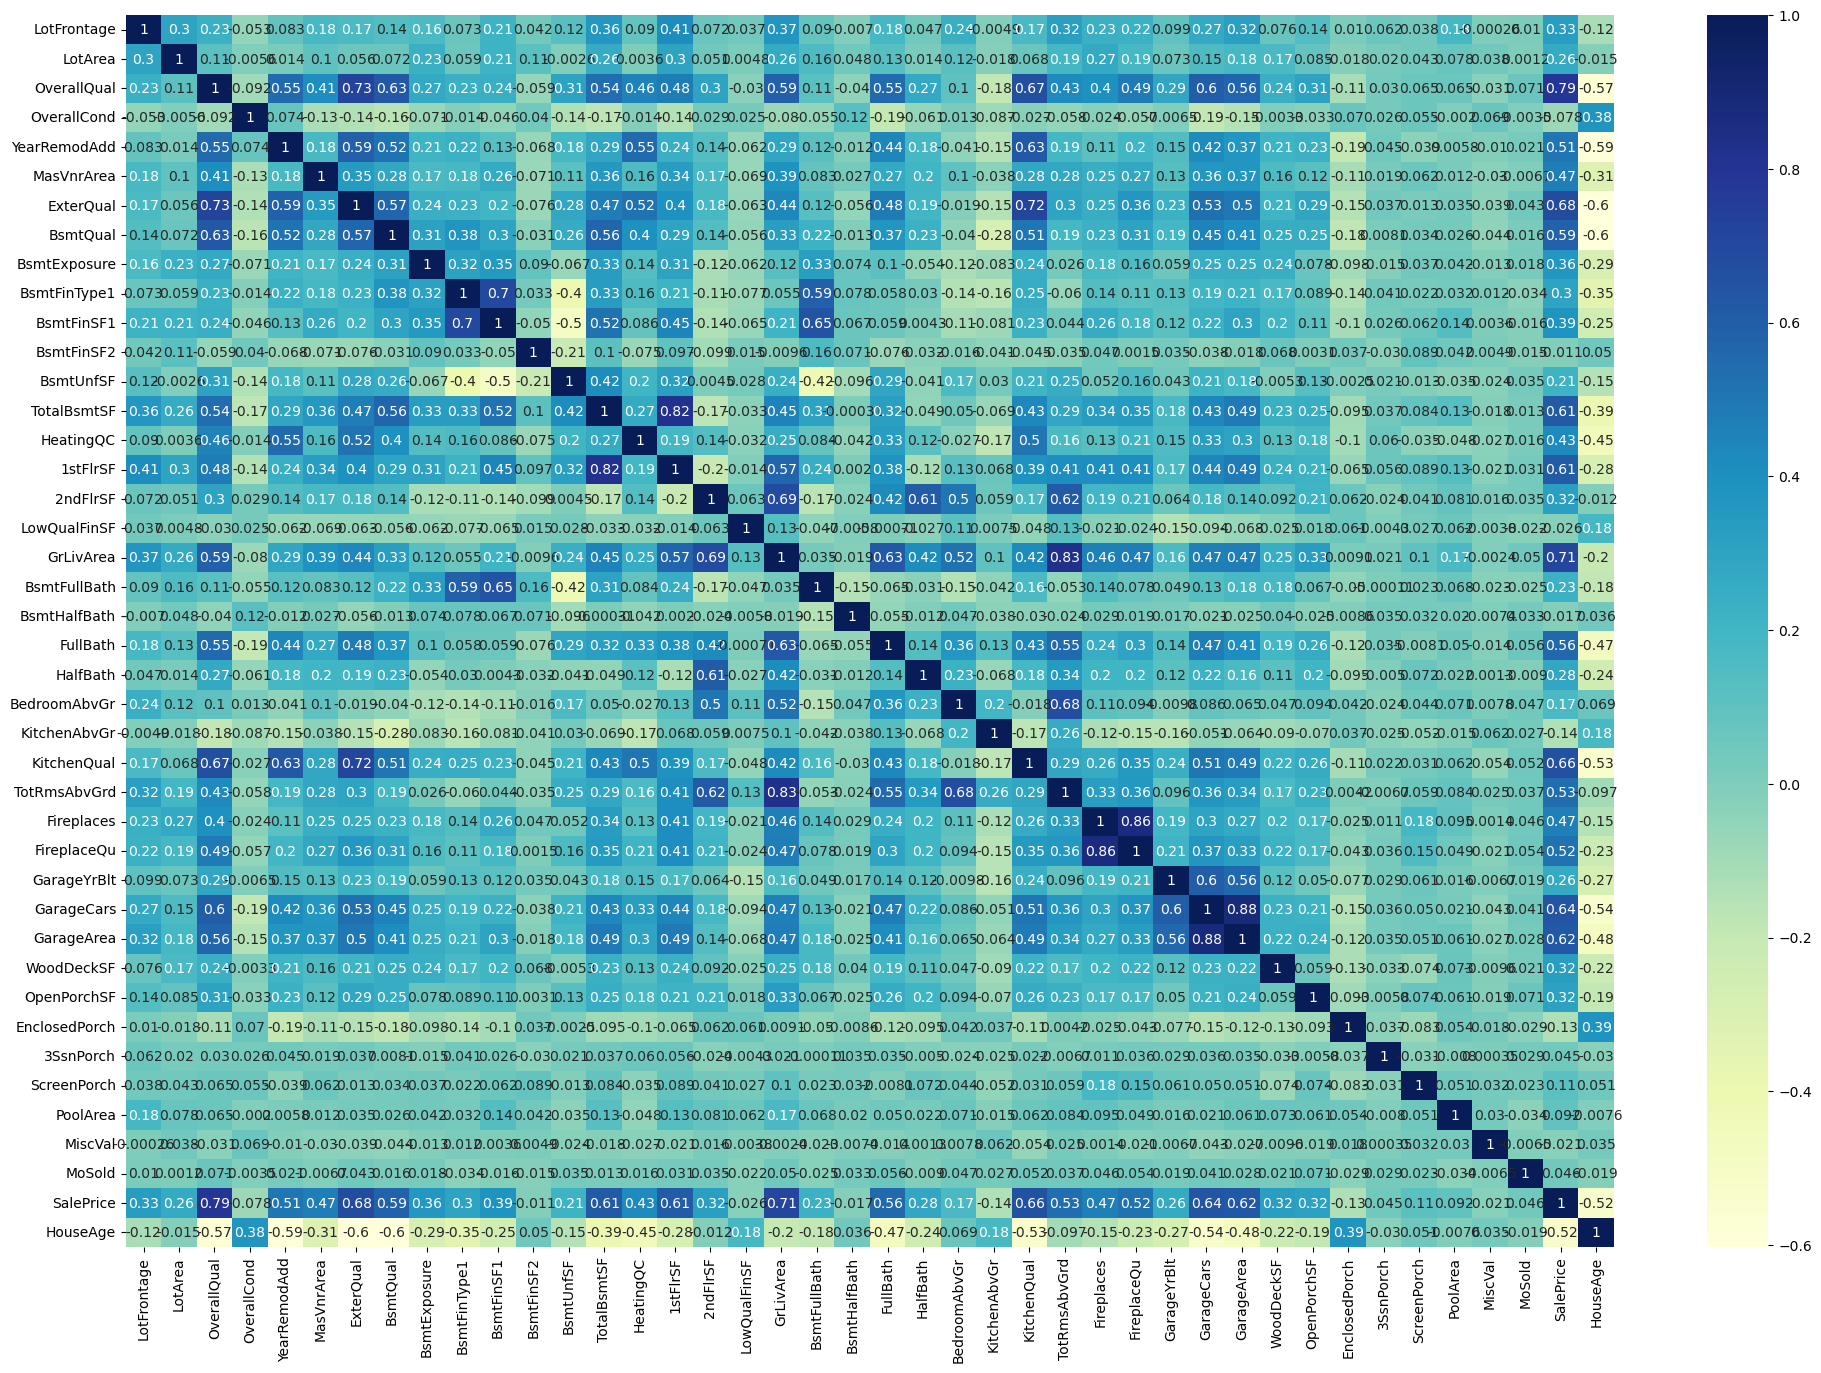

In [29]:
plt.figure(figsize=(24,16))


sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

#Inferences: Based on the correlation we can make few following interpretions

SalePrice is very high positively correlated to the Overall Quality(0.79)
SalePrice is very high positively correlated to the 1stFlrSF (0.61)
SalePrice is very high positively correlated to the TotalBsmtSF (0.61)
SalePrice is very high positively correlated to the GrLivArea (0.71)
SalePrice is very high positively correlated to the FullBath(0.56)
SalePrice is very high positively correlated to the TotRmsAbvGrd(0.53)
SalePrice is very high positively correlated to the GarageCars(0.64)
SalePrice is very high positively correlated to the GarageAre(0.62)
SalePrice is very high negatively correlated to the HouseAge(-0.52)
SalePrice is very high positively correlated to the ExterQual(0.68)
SalePrice is very high positively correlated to the BsmtQual(0.68)
SalePrice is very high positively correlated to the KitchenQual(0.68)



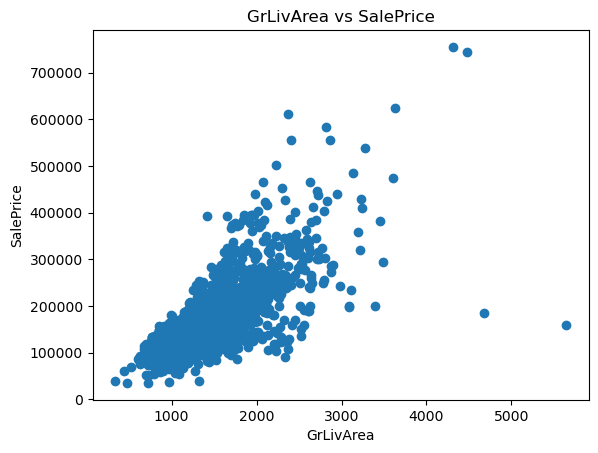

In [30]:
plt.scatter(data_house.GrLivArea, data_house.SalePrice)

plt.title('GrLivArea vs SalePrice')

plt.xlabel('GrLivArea')

plt.ylabel('SalePrice')

plt.show()

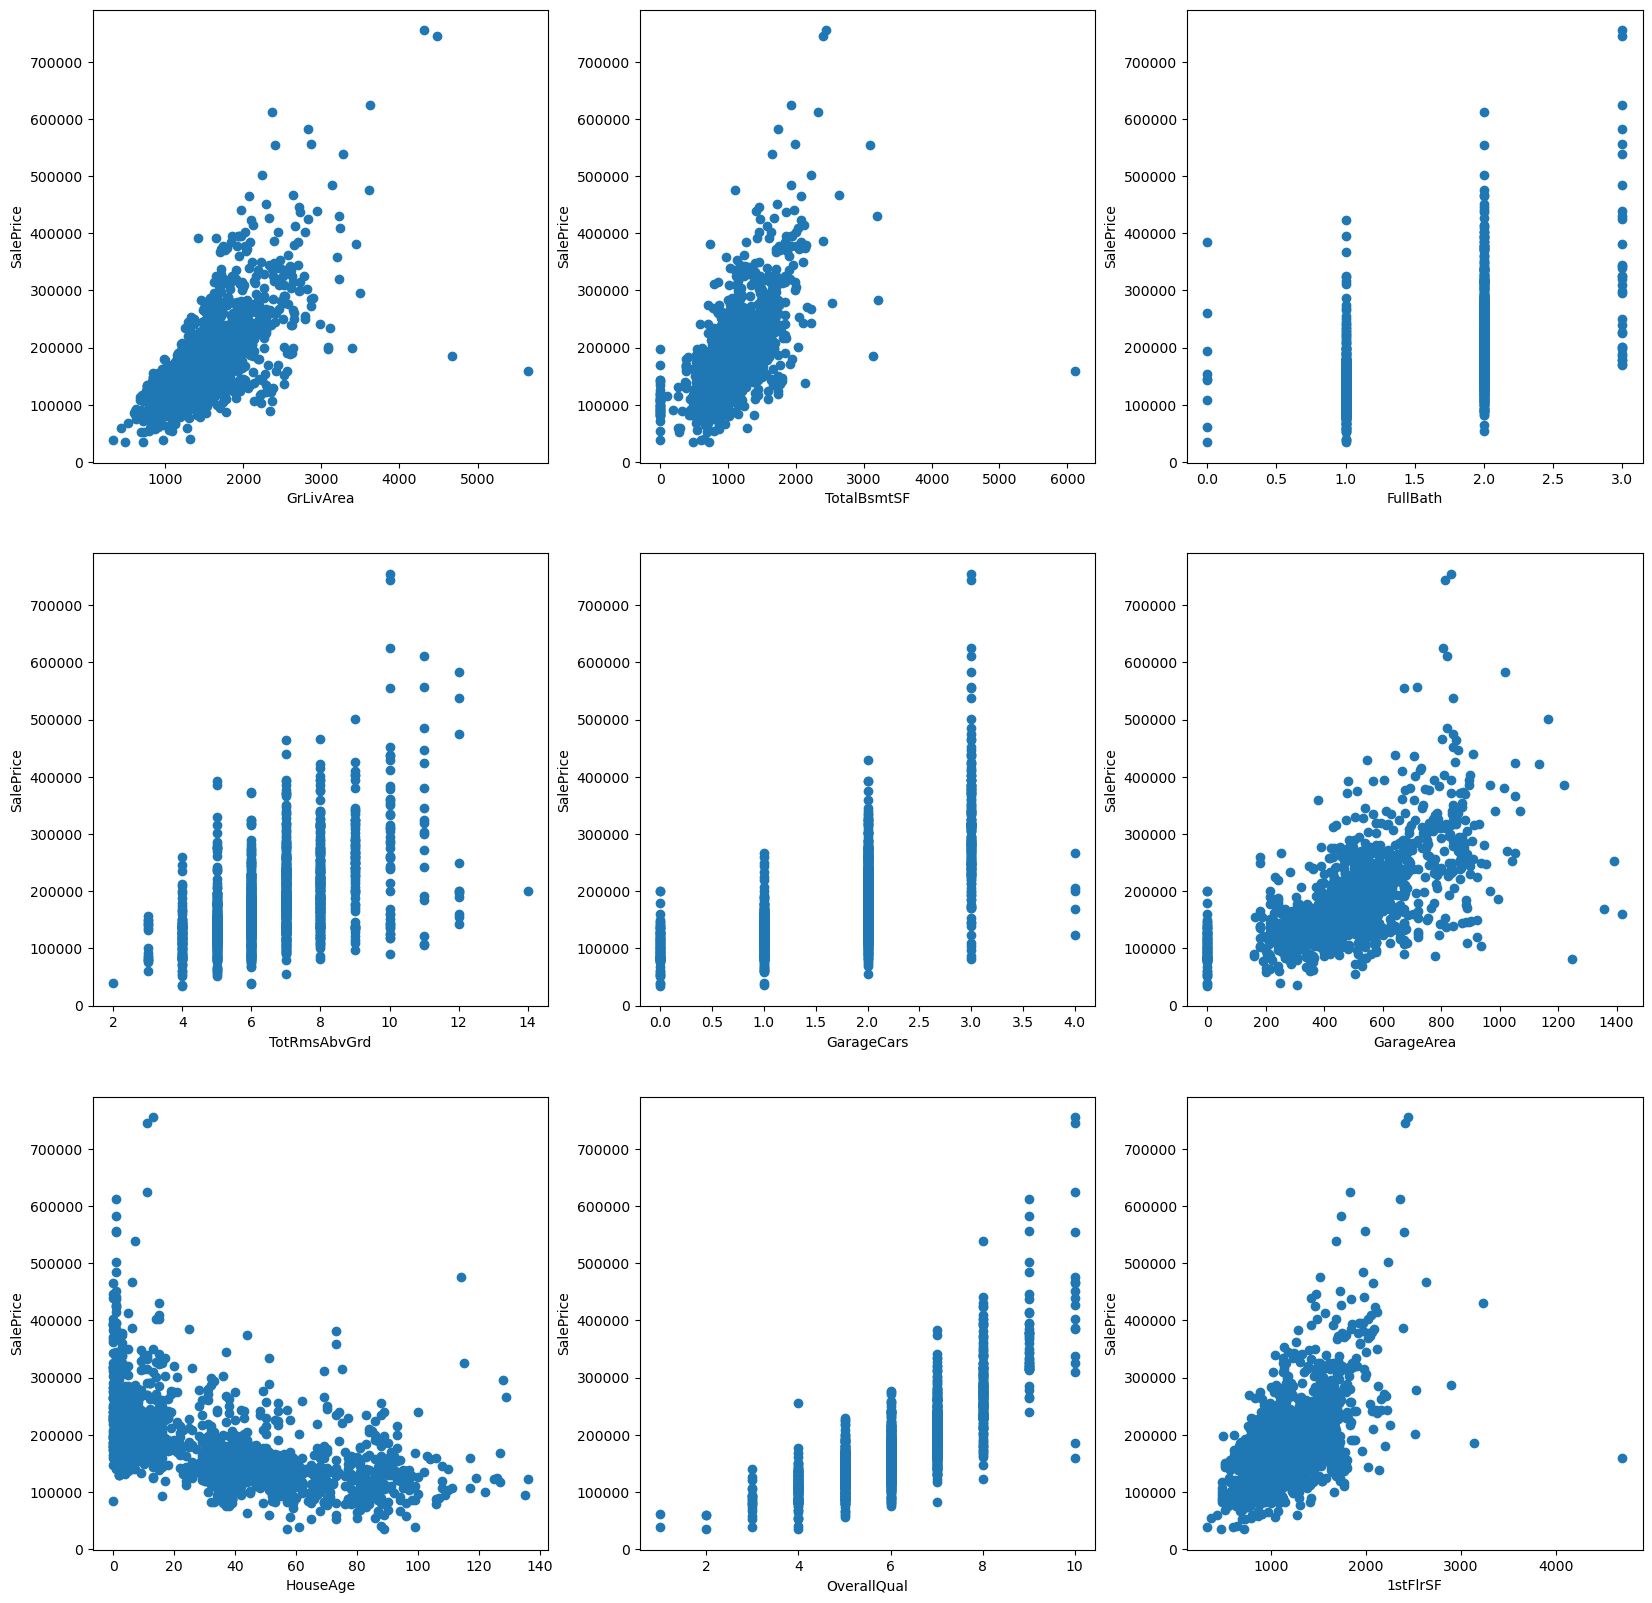

In [31]:
plt.figure(figsize = (20,20)) 
i=0
corr_colns=['GrLivArea','TotalBsmtSF','FullBath','TotRmsAbvGrd','GarageCars','GarageArea','HouseAge','OverallQual','1stFlrSF']

for column in corr_colns:
    i+=1
    plt.subplot(3,3,i)
    plt.scatter(data_house[column], data_house.SalePrice)
    plt.xlabel(column)
    plt.ylabel('SalePrice')
    
plt.show()


Inferences :

We see that most of the variables are linearly correlated to SalePrice so there is a scope of doing the regresssion model.
We even observe that some variables like FullBath, GarageCars are not continuously distributed so we can encode them according to theie characteritics.

In [32]:
data_house['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

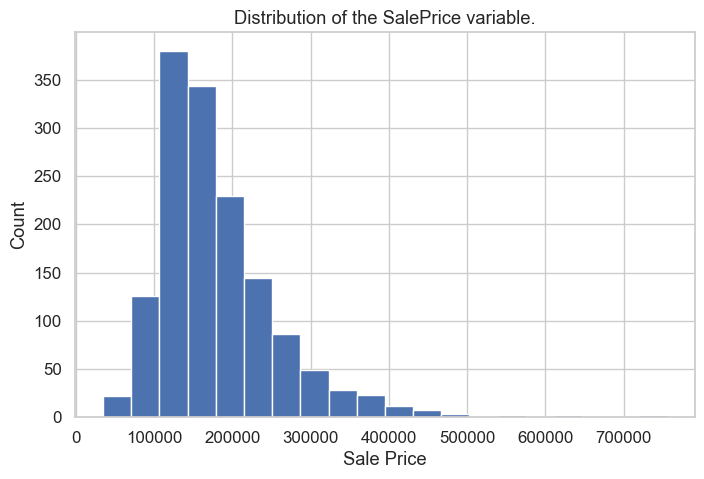

In [33]:
sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})
sns.distplot(data_house['SalePrice'], norm_hist=False, kde=False, bins=20, hist_kws={"alpha": 1}).set(xlabel='Sale Price', ylabel='Count');
plt.title("Distribution of the SalePrice variable.")
plt.show()


 mu = 180921.20 and sigma = 79415.29



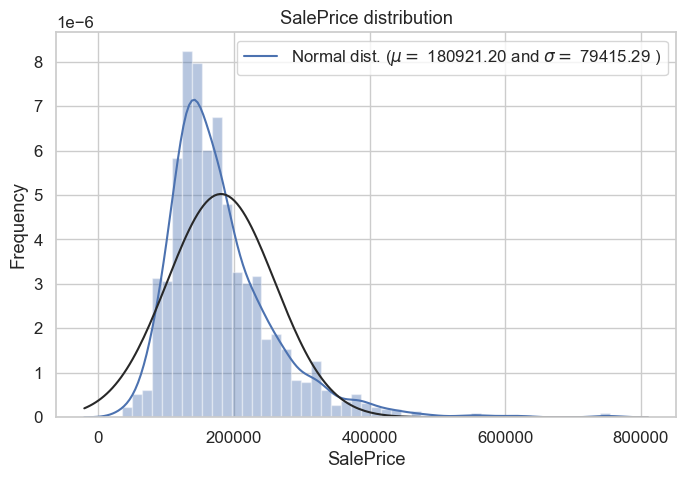

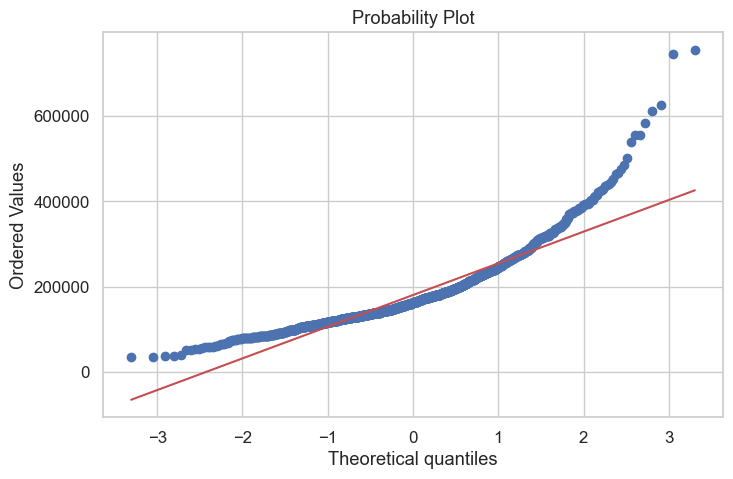

In [34]:
from scipy.stats import norm, skew 
from scipy import stats
sns.distplot(data_house['SalePrice'] , fit=norm);

# Estimating the mu and sigma using the fit function
(mu, sigma) = norm.fit(data_house['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Plotting the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Plotting the QQ-plot
fig = plt.figure()
res = stats.probplot(data_house['SalePrice'], plot=plt)
plt.show()


 mu = 12.02 and sigma = 0.40



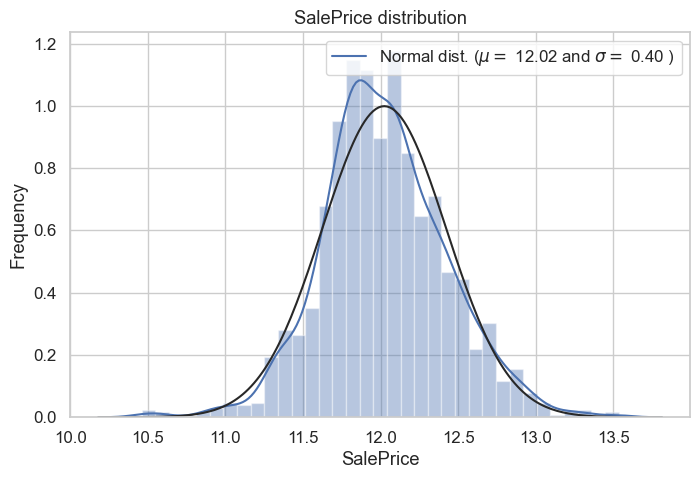

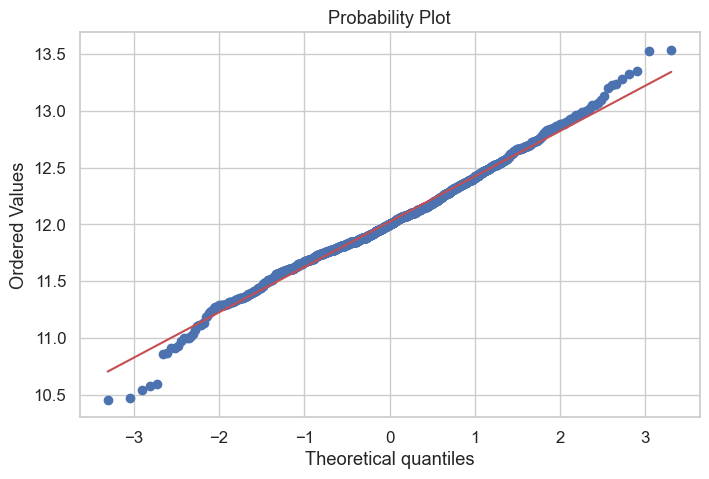

In [35]:
#We use the numpy function log to all elements of the column
data_house["SalePrice"] = np.log(data_house["SalePrice"])

#Checking the new distribution 
sns.distplot(data_house['SalePrice'] , fit=norm);

# Estimating the mu and sigma using the fit function
(mu, sigma) = norm.fit(data_house['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Plotting the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Plotting the QQ-plot
fig = plt.figure()
res = stats.probplot(data_house['SalePrice'], plot=plt)
plt.show()

In [36]:
data_house['MSSubClass']=data_house['MSSubClass'].astype('object')
cat_feats  = data_house.dtypes[data_house.dtypes == "object"].index
cat_feats  

Index(['MSSubClass', 'MSZoning', 'LotShape', 'LotConfig', 'Neighborhood', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'GarageType', 'GarageFinish'], dtype='object')

In [37]:

dummy = pd.get_dummies(data_house[['MSSubClass','MSZoning',  'LotShape', 
       'LotConfig',  'Neighborhood',  
        'HouseStyle', 'RoofStyle',  'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'Foundation',    'GarageType','GarageFinish' ]], drop_first=True)
dummy.head()

,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0
2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0
3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0


In [38]:
data_house = pd.concat([data_house, dummy], axis=1)
data_house.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,4,PConc,4,1,6,706,0,150,856,5,856,854,0,1710,1,0,2,1,3,1,4,8,0,0,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,0,2,12.247694,5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,1976,Gable,MetalSd,MetalSd,None,0.0,3,CBlock,4,4,5,978,0,284,1262,5,1262,0,0,1262,0,1,2,0,3,1,3,6,1,3,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,0,5,12.109011,31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0
2,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,4,PConc,4,2,6,486,0,434,920,5,920,866,0,1786,1,0,2,1,3,1,4,6,1,3,Attchd,2001.0,RFn,2,608,0,42,0,0,0,0,0,9,12.317167,7,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0
3,70,RL,60.0,9550,IR1,Corner,Crawfor,2Story,7,5,1970,Gable,Wd Sdng,Wd Shng,None,0.0,3,BrkTil,3,1,5,216,0,540,756,4,961,756,0,1717,1,0,1,0,3,1,4,7,1,4,Detchd,1998.0,Unf,3,642,0,35,272,0,0,0,0,2,11.849398,91,0,0,0,0,0,1,0,0,

In [39]:
data_house=data_house.drop(['MSSubClass','MSZoning',  'LotShape', 
       'LotConfig',  'Neighborhood',  
        'HouseStyle', 'RoofStyle',  'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'Foundation',    'GarageType','GarageFinish' ], axis = 1)

In [40]:
data_house.shape

(1460, 149)

DATA MODELIMG- TRAINTEST SPLIT

In [41]:
np.random.seed(0)
house_train,house_test = train_test_split(data_house, train_size=0.7,random_state=100)
print(house_train.shape)
print(house_test.shape)

(1021, 149)
(439, 149)


In [42]:
y_train=house_train.pop('SalePrice')
X_train=house_train
y_test=house_test.pop('SalePrice')
X_test=house_test

## Scaling

In [43]:
from sklearn.preprocessing import MinMaxScaler
#1. Instantiate an scaler object
scaler=MinMaxScaler()
numeric_feats = X_train.dtypes[X_train.dtypes != "object"].index
X_train[numeric_feats]=scaler.fit_transform(X_train[numeric_feats])

In [44]:
X_test[numeric_feats]=scaler.transform(X_test[numeric_feats])
X_train.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,ExterQual,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf
318,0.236301,0.039403,0.666667,0.500,0.716667,0.16,0.666667,0.8,1.0,1.000000,0.174876,0.000000,0.154110,0.220458,1.00,0.231481,0.616949,0.0,0.424289,0.333333,0.0,0.666667,0.5,0.500,0.0,0.666667,0.545455,0.333333,0.6,0.991542,0.75,0.462623,0.396733,0.114723,0.260870,0.0,0.0,0.0,0.0,0.272727,0.117647,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
239,0.106164,0.033981,0.555556,0.375,0.000000,0.00,0.333333,0.6,0.0,0.333333,0.016655,0.000000,0.274401,0.120295,0.50,0.098611,0.333656,0.0,0.201576,0.000000,0.0,0.333333,0.5,0.375,0.0,0.333333,0.363636,0.333333,0.8,0.969652,0.25,0.155148,0.000000,0.267686,0.000000,0.0,0.0,0.0,0.0,0.272727,0.477941,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
986,0.130137,0.017931,0.555556,0.875,0.883333,0.00,0.333333,0.6,0.0,0.166667,0.000000,0.000000,0.207620,0.079378,0.75,0.145602,0.307022,0.0,0.230015,0.000000,0.0,0.333333,0.0,0.2

## RFE technique 

In [45]:
lm = LinearRegression()  # Instantiating
lm.fit(X_train, y_train)

LinearRegression()

In [46]:
from sklearn.feature_selection import RFE
lm = LinearRegression()   
rfe = RFE(lm, step =90)
rfe.fit(X_train, y_train)  
print(rfe.support_)        #True or False   
print(rfe.ranking_)

[ True  True  True  True False False False  True  True  True  True  True
  True  True False  True  True  True  True  True False  True  True False
  True False  True False  True  True  True False  True False  True  True
  True  True  True False  True  True  True  True False False False False
 False False False  True  True  True False  True  True  True  True False
  True False False False  True False False False  True  True False  True
 False False False  True False False False False  True  True False False
 False False  True  True False  True  True  True  True  True False False
 False False False False False False  True  True  True  True  True False
 False False False False False False False False  True  True False  True
  True False  True  True  True False False False False False False False
 False False False False False  True False  True  True  True False  True
  True  True False False]
[1 1 1 1 2 2 2 1 1 1 1 1 1 1 2 1 1 1 1 1 2 1 1 2 1 2 1 2 1 1 1 2 1 2 1 1 1
 1 1 2 1 1 1 1 2 2 2 2 

In [47]:
col = X_train.columns[rfe.support_]
col

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'KitchenAbvGr', 'TotRmsAbvGrd', 'FireplaceQu', 'GarageYrBlt', 'GarageCars', 'WoodDeckSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'HouseAge', 'MSSubClass_30', 'MSSubClass_40', 'MSSubClass_45', 'MSSubClass_120', 'MSSubClass_160', 'MSSubClass_180', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'LotShape_IR3', 'LotConfig_FR3', 'Neighborhood_BrkSide', 'Neighborhood_ClearCr', 'Neighborhood_Crawfor', 'Neighborhood_MeadowV', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_Somerst', 'Neighborhood_StoneBr', 'Neighborhood_Veenker', 'HouseStyle_1.5Unf', 'HouseStyle_1Story', 'HouseStyle_2.5Fin', 'HouseStyle_2.5Unf', 'Exterior1st_AsphShn', 'Exterior1st_BrkComm', 'Exterior1st_BrkFace',
       

In [48]:
# Features which can be excluded to make the model according to RFE
X_train.columns[~rfe.support_]

Index(['YearRemodAdd', 'MasVnrArea', 'ExterQual', 'HeatingQC', 'BsmtHalfBath', 'BedroomAbvGr', 'KitchenQual', 'Fireplaces', 'GarageArea', 'OpenPorchSF', 'MoSold', 'MSSubClass_50', 'MSSubClass_60', 'MSSubClass_70', 'MSSubClass_75', 'MSSubClass_80', 'MSSubClass_85', 'MSSubClass_90', 'MSSubClass_190', 'LotShape_IR2', 'LotShape_Reg', 'LotConfig_CulDSac', 'LotConfig_FR2', 'LotConfig_Inside', 'Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_CollgCr', 'Neighborhood_Edwards', 'Neighborhood_Gilbert', 'Neighborhood_IDOTRR', 'Neighborhood_Mitchel', 'Neighborhood_NAmes', 'Neighborhood_NPkVill', 'Neighborhood_NWAmes', 'Neighborhood_OldTown', 'Neighborhood_SWISU', 'Neighborhood_Sawyer', 'Neighborhood_SawyerW', 'Neighborhood_Timber', 'HouseStyle_2Story', 'HouseStyle_SFoyer', 'HouseStyle_SLvl', 'RoofStyle_Gable', 'RoofStyle_Gambrel', 'RoofStyle_Hip', 'RoofStyle_Mansard', 'RoofStyle_Shed', 'Exterior1st_HdBoard', 'Exterior1st_ImStucc', 'Exterior1st_MetalSd', 'Exterior1st_Plywood',
       'Ex

In [49]:
X_train_rfe1 =X_train[col]
import statsmodels.api as sm  
X_train_rfe1 = sm.add_constant(X_train_rfe1) #Adding Constant
X_train_rfe1.head()

,const,LotFrontage,LotArea,OverallQual,OverallCond,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,KitchenAbvGr,TotRmsAbvGrd,FireplaceQu,GarageYrBlt,GarageCars,WoodDeckSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR3,LotConfig_FR3,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_Crawfor,Neighborhood_MeadowV,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Foundation_Stone,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_Detchd,GarageType_NA,GarageFinish_NA
318,1.0,0.236301,0.039403,0.666667,0.500,0.8,1.0,1.000000,0.174876,0.000000,0.154110,0.220458,0.231481,0.616949,0.0,0.424289,0.333333,0.666667,0.5,0.0,0.545455,0.6,0.991542,0.75,0.396733,0.260870,0.0,0.0,0.0,0.0,0.117647,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
239,1.0,0.106164,0.033981,0.555556,0.375,0.6,0.0,0.333333,0.016655,0.000000,0.274401,0.120295,0.098611,0.333656,0.0,0.201576,0.000000,0.333333,0.5,0.0,0.363636,0.8,0.969652,0.25,0.000000,0.000000,0.0,0.0,0.0,0.0,0.477941,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
986,1.0,0.130137,0.017931,0.555556,0.875,0.6,0.0,0.166667,0.000000,0.000000,0.207620,0.079378,0.145602,0.307022,0.0,0.230015,0.000000,0.333333,0.0,0.0,0.181818,0.0,0.970149,0.25,0.459743,0.000000,0.0,0.0,0.0,0.0,0.705882,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1416,1.0,0.133562,0.046139,0.333333,0.625,0.6,0.0,0.166667,0.000000,0.000000,0.332620,0.127169,0.202315,0.505569,0.0,0.355880,0.000000,0.666667,0.0,0.5,0.727273,0.0,0.980597,0.50,0.000000,0.206522,0.0,0.0,0.0,0.0,0.919118,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
390,1.0,0.099315,0.032409,0.444444,0.875,0.6,0.0,0.500000,0.042700,0.265265,0.098031,0.140917,0.136343,0.196610,0.0,0.178517,0.333333,0.333333,0.0,0.0,0.363636,0.0,0.984080,0.25,0.000000,0.202899,0.0,0.0,0.0,0.0,0.794118,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [50]:
lm1 = sm.OLS(y_train, X_train_rfe1).fit()   
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     137.2
Date:                Sun, 24 Sep 2023   Prob (F-statistic):               0.00
Time:                        19:31:50   Log-Likelihood:                 710.78
No. Observations:                1021   AIC:                            -1284.
Df Residuals:                     952   BIC:                            -943.5
Df Model:                          68                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    9.3269 

In [51]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_train_rfe1.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe1.values, i) for i in range(X_train_rfe1.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif

,Features,VIF
0,const,0.00
1,LotFrontage,2.08
2,LotArea,1.49
3,OverallQual,3.99
4,OverallCond,1.51
...,...,...
70,GarageType_Basment,2.45
71,GarageType_BuiltIn,8.38
72,GarageType_Detchd,22.92
73,GarageType_NA,inf


The Linear regression model built with 90 columns selected by RFE technique had the accuracy(Adjusted R-squared) of 92.5% and the columns has VIF value of infinite which shows multicollinerity.
Though the accuracy the good it has many features and highly collinear.

In [52]:
#we are deleting the other columns not selected by RFE techinque
X_train = X_train[col]
X_test = X_test[col]
X_train

,LotFrontage,LotArea,OverallQual,OverallCond,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,KitchenAbvGr,TotRmsAbvGrd,FireplaceQu,GarageYrBlt,GarageCars,WoodDeckSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR3,LotConfig_FR3,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_Crawfor,Neighborhood_MeadowV,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Foundation_Stone,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_Detchd,GarageType_NA,GarageFinish_NA
318,0.236301,0.039403,0.666667,0.500,0.8,1.000000,1.000000,0.174876,0.000000,0.154110,0.220458,0.231481,0.616949,0.0,0.424289,0.333333,0.666667,0.5,0.0,0.545455,0.6,0.991542,0.75,0.396733,0.260870,0.0,0.0,0.0,0.0,0.117647,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
239,0.106164,0.033981,0.555556,0.375,0.6,0.000000,0.333333,0.016655,0.000000,0.274401,0.120295,0.098611,0.333656,0.0,0.201576,0.000000,0.333333,0.5,0.0,0.363636,0.8,0.969652,0.25,0.000000,0.000000,0.0,0.0,0.0,0.0,0.477941,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
986,0.130137,0.017931,0.555556,0.875,0.6,0.000000,0.166667,0.000000,0.000000,0.207620,0.079378,0.145602,0.307022,0.0,0.230015,0.000000,0.333333,0.0,0.0,0.181818,0.0,0.970149,0.25,0.459743,0.000000,0.0,0.0,0.0,0.0,0.705882,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1416,0.133562,0.046139,0.333333,0.625,0.6,0.000000,0.166667,0.000000,0.000000,0.332620,0.127169,0.202315,0.505569,0.0,0.355880,0.000000,0.666667,0.0,0.5,0.727273,0.0,0.980597,0.50,0.000000,0.206522,0.0,0.0,0.0,0.0,0.919118,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
390,0.099315,0.032409,0.444444,0.875,0.6,0.000000,0.500000,0.042700,0.265265,0.098031,0.140917,0.136343,0.196610,0.0,0.178517,0.333333,0.333333,0.0,0.0,0.363636,0.0,0.984080,0.25,0.000000,0.202899,0.0,0.0,0.0,0.0,0.794118,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
802,0.143836,0.031445,0.666667,0.500,0.8,0.666667,1.000000,0.114812,0.000000,0.034247,0.119149,0.082407,0.352542,0.0,0.195619,0.333333,0.666667,0.5,0.0,0.363636,0.8,0.997512,0.50,0.042007,0.000000,0.0,0.0,0.0,0.0,0.022059,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
53,0.160959,0.228257,0.888889,0.500,1.0,1.000000,1.000000,0.320695,0.000000,0.013699,0.301473,0.340278,0.000000,0.0,0.269792,0.666667,0.000000,0.5,0.0,0.181818,0.8,0.985572,0.75,1.000000,0.000000,0.0,0

## Ridge Regression Model

In [53]:
# Lets assume alpha is 0.001 and build a Ridge regression model
ridge = Ridge(alpha=0.001)
ridge.fit(X_train,y_train)

y_train_pred = ridge.predict(X_train)
print(r2_score(y_train,y_train_pred))

0.9074125020124684


In [54]:
# Tune hyperparameter
params = {'alpha':  [0.001,0.01,0.5, 1.0, 10.0, 50, 100,500, 1000]}

# Build model using Ridge regression
ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.01, 0.5, 1.0, 10.0, 50, 100, 500,
                                   1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [55]:
cv_results = pd.DataFrame(model_cv.cv_results_)

cv_results.head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.003790,0.000746,0.002194,0.000977,0.001,{'alpha': 0.001},-0.095944,-0.097075,-0.099413,-0.085541,-0.086644,-0.092924,0.005699,3,-0.083722,-0.075775,-0.080869,-0.086663,-0.086334,-0.082673,0.004031
1,0.003392,0.000799,0.001597,0.000487,0.01,{'alpha': 0.01},-0.095966,-0.097272,-0.099483,-0.085432,-0.086596,-0.092950,0.005785,4,-0.083755,-0.075857,-0.080887,-0.086706,-0.086402,-0.082721,0.004024
2,0.003790,0.000977,0.001795,0.000399,0.5,{'alpha': 0.5},-0.094408,-0.097559,-0.098951,-0.082778,-0.086783,-0.092096,0.006280,2,-0.084051,-0.077198,-0.081241,-0.087114,-0.086805,-0.083282,0.003711
3,0.002395,0.000488,0.001395,0.000490,1.0,{'alpha': 1.0},-0.093636,-0.097852,-0.098841,-0.082454,-0.087188,-0.091994,0.006293,1,-0.084719,-0.078322,-0.081913,-0.087694,-0.087199,-0.083969,0.003492
4,0.002793,0.000398,0.001595,0.000489,10.0,{'alpha': 10.0},-0.097755,-0.109542,-0.106054,-0.090596,-0.096982,-0.100186,0.006784,5,-0.095484,-0.091076,-0.093686,-0.098570,-0.097317,-0.095227,0.002654
5,0.002390,0.000485,0.001796,0.000400,50,{'alpha': 50},-0.121593,-0.138677,-0.133265,-0.121801,-0.131188,-0.129305,0.006676,6,-0.126419,-0.123122,-0.125078,-0.128179,-0.127902,-0.126140,0.001875
6,0.002593,0.000798,0.001995,0.000631,100,{'alpha': 100},-0.141200,-0.156722,-0.153104,-0.144437,-0.156543,-0.150401,0.006406,7,-0.148838,-0.145612,-0.147322,-0.149261,-0.149340,-0.148075,0.001430
7,0.003187,0.000392,0.001796,0.000400,500,{'alpha': 500},-0.212129,-0.215887,-0.212316,-0.209137,-0.230798,-0.216053,0.007676,8,-0.215898,-0.214726,-0.215611,-0.215098,-0.214548,-0.215176,0.000513
8,0.002593,0.000489,0.001198,0.000399,1000,{'alpha': 1000},-0.246144,-0.247669,-0.242405,-0.237643,-0.262825,-0.247337,0.008482,9,-0.247208,-0.246243,-0.247328,-0.247193,-0.245183,-0.246631,0.000822


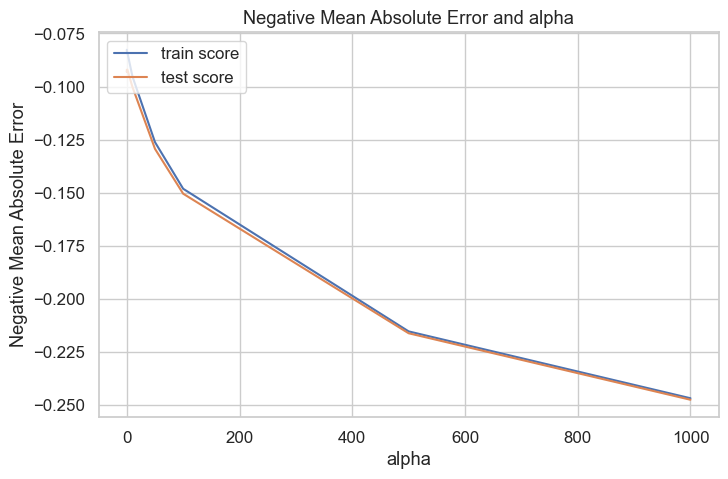

In [56]:
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [57]:
# list of alphas to tune
params = {'alpha': [0.001,0.01, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 13 candidates, totalling 65 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.01, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0,
                                   7.0, 8.0, 9.0, 10.0, 20]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [58]:
cv_results = pd.DataFrame(model_cv.cv_results_)
#cv_results = cv_results[cv_results['param_alpha']<=20]
cv_results.head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.004197,1.463975e-03,0.001794,0.000399,0.001,{'alpha': 0.001},-0.095944,-0.097075,-0.099413,-0.085541,-0.086644,-0.092924,0.005699,3,-0.083722,-0.075775,-0.080869,-0.086663,-0.086334,-0.082673,0.004031
1,0.002585,4.824982e-04,0.001999,0.000632,0.01,{'alpha': 0.01},-0.095966,-0.097272,-0.099483,-0.085432,-0.086596,-0.092950,0.005785,4,-0.083755,-0.075857,-0.080887,-0.086706,-0.086402,-0.082721,0.004024
2,0.002780,3.929107e-04,0.001408,0.000490,1.0,{'alpha': 1.0},-0.093636,-0.097852,-0.098841,-0.082454,-0.087188,-0.091994,0.006293,1,-0.084719,-0.078322,-0.081913,-0.087694,-0.087199,-0.083969,0.003492
3,0.002598,4.928939e-04,0.001788,0.000396,2.0,{'alpha': 2.0},-0.093060,-0.099003,-0.098997,-0.082928,-0.088163,-0.092430,0.006249,2,-0.086000,-0.080290,-0.083374,-0.088970,-0.088261,-0.085379,0.003209
4,0.002793,3.988267e-04,0.001795,0.000399,3.0,{'alpha': 3.0},-0.092910,-0.100509,-0.099323,-0.083860,-0.089262,-0.093173,0.006225,5,-0.087353,-0.081981,-0.084862,-0.090312,-0.089385,-0.086778,0.003043
5,0.002396,4.872463e-04,0.001986,0.000631,4.0,{'alpha': 4.0},-0.093150,-0.101931,-0.099865,-0.084657,-0.090374,-0.093995,0.006300,6,-0.088627,-0.083430,-0.086318,-0.091564,-0.090568,-0.088101,0.002945
6,0.003201,7.299441e-04,0.002390,0.000492,5.0,{'alpha': 5.0},-0.093756,-0.103375,-0.100750,-0.085600,-0.091530,-0.095002,0.006405,7,-0.089882,-0.084704,-0.087675,-0.092874,-0.091738,-0.089375,0.002925
7,0.002992,2.780415e-07,0.001396,0.000489,6.0,{'alpha': 6.0},-0.094544,-0.104719,-0.101796,-0.086566,-0.092688,-0.096063,0.006507,8,-0.091082,-0.086004,-0.088997,-0.094109,-0.092913,-0.090621,0.002884
8,0.002595,4.902418e-04,0.001396,0.000492,7.0,{'alpha': 7.0},-0.095386,-0.105983,-0.102938,-0.087575,-0.093777,-0.097132,0.006599,9,-0.092248,-0.087315,-0.090240,-0.095270,-0.094035,-0.091822,0.002821
9,0.005585,2.411655e-03,0.002593,0.001197,8.0,{'alpha': 8.0},-0.096207,-0.107233,-0.104020,-0.088592,-0.094822,-0.098175,0.006681,10,-0.093375,-0.088594,-0.091441,-0.096380,-0.095120,-0.092982,0.002753


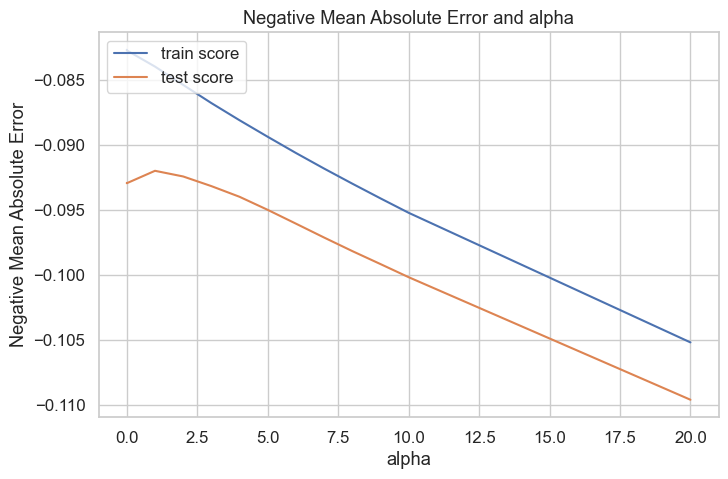

In [59]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [60]:
# Finding out the best score and Optimum value of alpha
print(model_cv.best_estimator_)
best_ridge_score = model_cv.best_score_
best_ridge_alpha = model_cv.best_params_["alpha"]

print(" The best r2 score is obtained at alpha {0}".format(best_ridge_alpha))

Ridge()
 The best r2 score is obtained at alpha 1.0


In [61]:
# Model building using optimal alpha
#ridge = Ridge(alpha=best_ridge_alpha)
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
#creating coeffcients for the ridge regression
model_parameter = list(ridge.coef_)
model_parameter.insert(0,ridge.intercept_)
cols = house_train.columns
cols.insert(0,'const')
ridge_coef = pd.DataFrame(list(zip(cols,model_parameter,(abs(ele) for ele in model_parameter))))
ridge_coef.columns = ['Features','Coefficient','Mod']


In [62]:
#selecting the top 10 variables
ridge_coef.sort_values(by='Mod',ascending=False).head(10)

,Features,Coefficient,Mod
0,LotFrontage,10.549317,10.549317
3,OverallCond,0.492713,0.492713
15,1stFlrSF,0.383561,0.383561
4,YearRemodAdd,0.349258,0.349258
12,BsmtUnfSF,0.348271,0.348271
30,GarageCars,-0.272676,0.272676
23,BedroomAbvGr,0.271670,0.271670
38,MiscVal,0.266173,0.266173
39,MoSold,0.246518,0.246518
37,PoolArea,0.236505,0.236505


In [63]:
from sklearn import metrics
# Prediction using ridge regression
y_train_ridge_pred = ridge.predict(X_train)
print("Ridge regression train r2: ",round(metrics.r2_score(y_true=y_train, y_pred=y_train_ridge_pred),4))
y_test_ridge_pred = ridge.predict(X_test)
print("Ridge regression test r2: ",round(metrics.r2_score(y_true=y_test, y_pred=y_test_ridge_pred),4))

Ridge regression train r2:  0.9049
Ridge regression test r2:  0.8851


## Lasso Regression model¶

In [64]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100]}
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 26 candidates, totalling 130 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [65]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.016155,0.004109,0.001995,2.132481e-07,0.0001,{'alpha': 0.0001},-0.094502,-0.096514,-0.098064,-0.082379,-0.086119,-0.091516,0.006154,1,-0.083522,-0.076759,-0.080810,-0.086560,-0.086601,-0.082851,0.003730
1,0.003394,0.000487,0.001792,3.972945e-04,0.001,{'alpha': 0.001},-0.091323,-0.098798,-0.098043,-0.086702,-0.093954,-0.093764,0.004461,2,-0.091202,-0.086150,-0.087138,-0.093256,-0.092259,-0.090001,0.002834
2,0.002784,0.000750,0.001596,4.893420e-04,0.01,{'alpha': 0.01},-0.130018,-0.153504,-0.142612,-0.130538,-0.142179,-0.139770,0.008750,3,-0.138443,-0.133847,-0.137536,-0.138926,-0.138401,-0.137431,0.001847
3,0.002792,0.000399,0.001795,3.990651e-04,0.05,{'alpha': 0.05},-0.259376,-0.264742,-0.255107,-0.255511,-0.275791,-0.262105,0.007670,4,-0.263500,-0.260533,-0.263180,-0.259366,-0.260546,-0.261425,0.001624
4,0.002593,0.000489,0.001795,3.995422e-04,0.1,{'alpha': 0.1},-0.312646,-0.312179,-0.306816,-0.295412,-0.325987,-0.310608,0.009883,5,-0.310026,-0.309197,-0.310983,-0.313371,-0.306761,-0.310068,0.002165


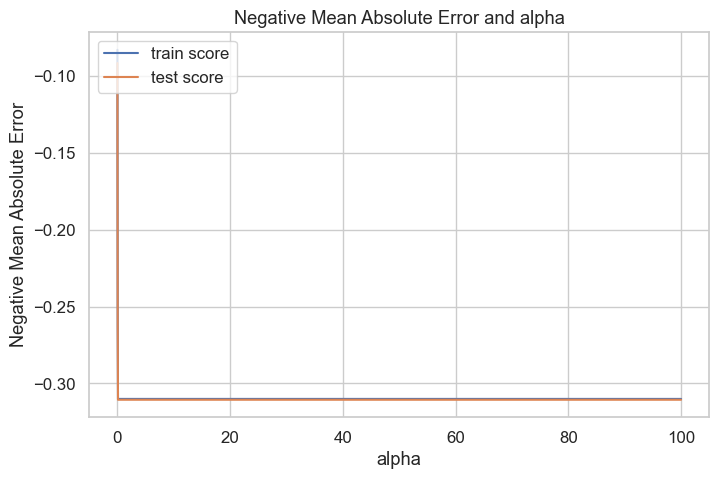

In [66]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [67]:
# list of alphas to tune
params = {'alpha': [0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]}
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 13 candidates, totalling 65 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5,
                                   0.6, 0.7, 0.8, 0.9, 1.0]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [68]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.005965,0.000617,0.002208,0.000383,0.001,{'alpha': 0.001},-0.091323,-0.098798,-0.098043,-0.086702,-0.093954,-0.093764,0.004461,1,-0.091202,-0.086150,-0.087138,-0.093256,-0.092259,-0.090001,0.002834
1,0.003197,0.000745,0.001592,0.000784,0.01,{'alpha': 0.01},-0.130018,-0.153504,-0.142612,-0.130538,-0.142179,-0.139770,0.008750,2,-0.138443,-0.133847,-0.137536,-0.138926,-0.138401,-0.137431,0.001847
2,0.002395,0.000490,0.001608,0.000501,0.05,{'alpha': 0.05},-0.259376,-0.264742,-0.255107,-0.255511,-0.275791,-0.262105,0.007670,3,-0.263500,-0.260533,-0.263180,-0.259366,-0.260546,-0.261425,0.001624
3,0.002585,0.000486,0.001399,0.000474,0.1,{'alpha': 0.1},-0.312646,-0.312179,-0.306816,-0.295412,-0.325987,-0.310608,0.009883,4,-0.310026,-0.309197,-0.310983,-0.313371,-0.306761,-0.310068,0.002165
4,0.002992,0.000003,0.001997,0.000631,0.2,{'alpha': 0.2},-0.312646,-0.312179,-0.306816,-0.295412,-0.325987,-0.310608,0.009883,4,-0.310026,-0.309197,-0.310983,-0.313371,-0.306761,-0.310068,0.002165


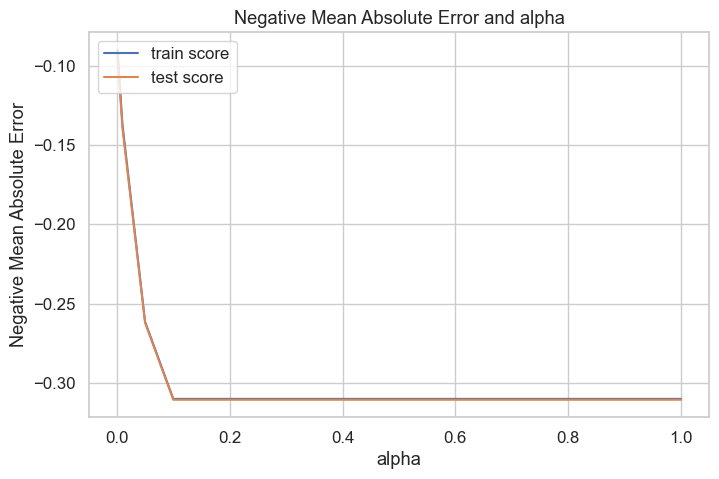

In [69]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [70]:
model_cv.best_params_

{'alpha': 0.001}

In [71]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1]}
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 5 candidates, totalling 25 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [72]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.015552,0.002055,0.002001,0.000013,0.0001,{'alpha': 0.0001},-0.094502,-0.096514,-0.098064,-0.082379,-0.086119,-0.091516,0.006154,1,-0.083522,-0.076759,-0.080810,-0.086560,-0.086601,-0.082851,0.003730
1,0.004787,0.000398,0.001802,0.000402,0.001,{'alpha': 0.001},-0.091323,-0.098798,-0.098043,-0.086702,-0.093954,-0.093764,0.004461,2,-0.091202,-0.086150,-0.087138,-0.093256,-0.092259,-0.090001,0.002834
2,0.004190,0.000398,0.002195,0.000401,0.01,{'alpha': 0.01},-0.130018,-0.153504,-0.142612,-0.130538,-0.142179,-0.139770,0.008750,3,-0.138443,-0.133847,-0.137536,-0.138926,-0.138401,-0.137431,0.001847
3,0.004192,0.000748,0.002592,0.000801,0.05,{'alpha': 0.05},-0.259376,-0.264742,-0.255107,-0.255511,-0.275791,-0.262105,0.007670,4,-0.263500,-0.260533,-0.263180,-0.259366,-0.260546,-0.261425,0.001624
4,0.003590,0.001016,0.001396,0.000488,0.1,{'alpha': 0.1},-0.312646,-0.312179,-0.306816,-0.295412,-0.325987,-0.310608,0.009883,5,-0.310026,-0.309197,-0.310983,-0.313371,-0.306761,-0.310068,0.002165


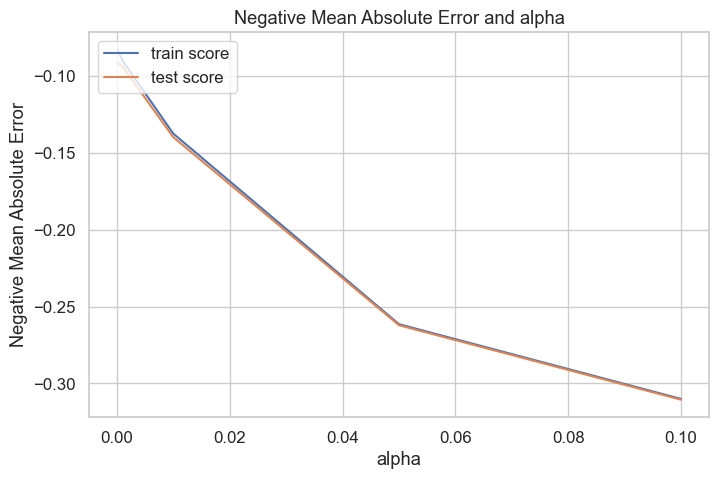

In [73]:
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [74]:
# list of alphas to tune
params = {'alpha': [0.00001,0.0001, 0.001, 0.01, 0.05]}
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 5 candidates, totalling 25 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-05, 0.0001, 0.001, 0.01, 0.05]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [75]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.039093,0.002131,0.002198,3.972124e-04,0.00001,{'alpha': 1e-05},-0.095913,-0.097356,-0.099380,-0.085137,-0.086537,-0.092865,0.005859,2,-0.083754,-0.075970,-0.080896,-0.086747,-0.086467,-0.082767,0.004005
1,0.016556,0.001849,0.001995,8.120244e-07,0.0001,{'alpha': 0.0001},-0.094502,-0.096514,-0.098064,-0.082379,-0.086119,-0.091516,0.006154,1,-0.083522,-0.076759,-0.080810,-0.086560,-0.086601,-0.082851,0.003730
2,0.004385,0.000492,0.001795,7.461492e-04,0.001,{'alpha': 0.001},-0.091323,-0.098798,-0.098043,-0.086702,-0.093954,-0.093764,0.004461,3,-0.091202,-0.086150,-0.087138,-0.093256,-0.092259,-0.090001,0.002834
3,0.002790,0.000404,0.001798,4.007598e-04,0.01,{'alpha': 0.01},-0.130018,-0.153504,-0.142612,-0.130538,-0.142179,-0.139770,0.008750,4,-0.138443,-0.133847,-0.137536,-0.138926,-0.138401,-0.137431,0.001847
4,0.002793,0.000399,0.001596,4.889866e-04,0.05,{'alpha': 0.05},-0.259376,-0.264742,-0.255107,-0.255511,-0.275791,-0.262105,0.007670,5,-0.263500,-0.260533,-0.263180,-0.259366,-0.260546,-0.261425,0.001624


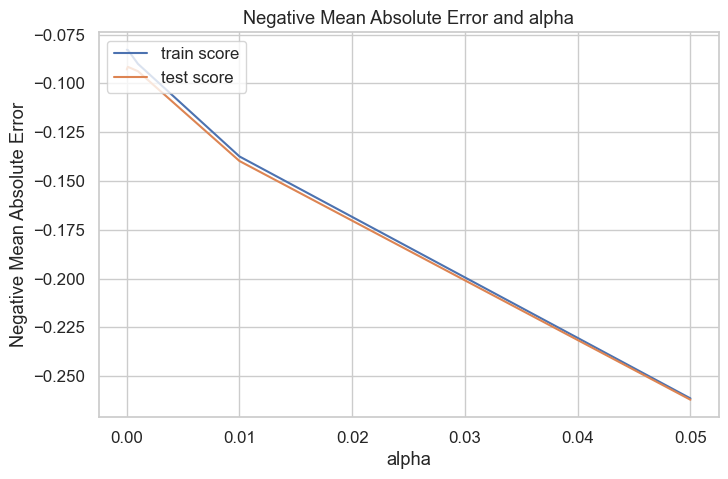

In [76]:
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [77]:
# Checking the best parameter(Alpha value)
model_cv.best_params_

{'alpha': 0.0001}

In [78]:
# list of alphas to tune
params = {'alpha': [0.00001,0.0001, 0.001]}
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 3 candidates, totalling 15 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-05, 0.0001, 0.001]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [79]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.037500,0.003920,0.001795,0.000746,0.00001,{'alpha': 1e-05},-0.095913,-0.097356,-0.099380,-0.085137,-0.086537,-0.092865,0.005859,2,-0.083754,-0.075970,-0.080896,-0.086747,-0.086467,-0.082767,0.004005
1,0.013567,0.001954,0.002191,0.000400,0.0001,{'alpha': 0.0001},-0.094502,-0.096514,-0.098064,-0.082379,-0.086119,-0.091516,0.006154,1,-0.083522,-0.076759,-0.080810,-0.086560,-0.086601,-0.082851,0.003730
2,0.006981,0.002360,0.003391,0.001493,0.001,{'alpha': 0.001},-0.091323,-0.098798,-0.098043,-0.086702,-0.093954,-0.093764,0.004461,3,-0.091202,-0.086150,-0.087138,-0.093256,-0.092259,-0.090001,0.002834


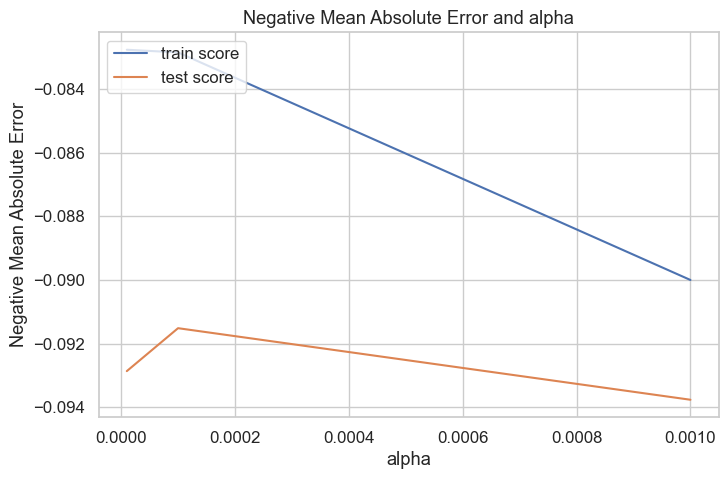

In [80]:
# plotting mean test and train scores with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [81]:
model_cv.best_params_

{'alpha': 0.0001}

In [82]:
# After performing grid search we found the same alpha that ue use before
lasso = Lasso(alpha=0.0001)
lasso.fit(X_train,y_train)

y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print("Lasso Regression train r2:",r2_score(y_true=y_train,y_pred=y_train_pred))
print("Lasso Regression test r2:",r2_score(y_true=y_test,y_pred=y_test_pred))

Lasso Regression train r2: 0.906111482949099
Lasso Regression test r2: 0.8860062511616117


In [83]:
model_param = list(lasso.coef_)
model_param.insert(0,lasso.intercept_)
cols = X_test.columns
cols.insert(0,'const')
lasso_coef = pd.DataFrame(list(zip(cols,model_param,(abs(ele) for ele in model_param))))
lasso_coef.columns = ['Feature','Coef','mod']
#selecting the top 10 variables
lasso_coef.sort_values(by='mod',ascending=False).head(10)

,Feature,Coef,mod
0,LotFrontage,10.525357,10.525357
15,BsmtFullBath,1.016293,1.016293
3,OverallCond,0.517381,0.517381
4,BsmtQual,0.360381,0.360381
38,MSZoning_RL,0.355171,0.355171
39,MSZoning_RM,0.328348,0.328348
37,MSZoning_RH,0.328329,0.328329
30,MSSubClass_30,-0.293792,0.293792
40,LotShape_IR3,0.288861,0.288861
2,OverallQual,0.272198,0.272198


We will make use of Lasso Regression model because it is using less numbers of variables and giving almost the same accuract. Its more efficient model than Ridge regression model

In [84]:
#below are the top 5 variables which provide significance
lasso_coef.sort_values(by='mod',ascending=False).head(5)

,Feature,Coef,mod
0,LotFrontage,10.525357,10.525357
15,BsmtFullBath,1.016293,1.016293
3,OverallCond,0.517381,0.517381
4,BsmtQual,0.360381,0.360381
38,MSZoning_RL,0.355171,0.355171


### Question 1 Ans:

In [93]:
#Double the alpha values and evaluate model
#For Ridge:
ridge_modified = Ridge(alpha=2.0)
ridge_modified.fit(X_train, y_train)
model_parameter = list(ridge_modified.coef_)
model_parameter.insert(0,ridge_modified.intercept_)
cols = house_train.columns
cols.insert(0,'const')
ridge_coef = pd.DataFrame(list(zip(cols,model_parameter,(abs(ele) for ele in model_parameter))))
ridge_coef.columns = ['Features','Coefficient','Mod']
#selecting the top 10 variables
ridge_coef.sort_values(by='Mod',ascending=False).head(10)

,Features,Coefficient,Mod
0,LotFrontage,10.627120,10.627120
3,OverallCond,0.481428,0.481428
4,YearRemodAdd,0.332725,0.332725
15,1stFlrSF,0.330292,0.330292
12,BsmtUnfSF,0.292362,0.292362
23,BedroomAbvGr,0.266685,0.266685
30,GarageCars,-0.252079,0.252079
13,TotalBsmtSF,0.208566,0.208566
38,MiscVal,0.196270,0.196270
17,LowQualFinSF,0.190793,0.190793


In [86]:
y_train_pred = ridge_modified.predict(X_train)
y_test_pred = ridge_modified.predict(X_test)

print("Ridge Regression train r2:",r2_score(y_true=y_train,y_pred=y_train_pred))
print("Ridge Regression test r2:",r2_score(y_true=y_test,y_pred=y_test_pred))

Ridge Regression train r2: 0.9022498939399662
Ridge Regression test r2: 0.8835805568118045


In [89]:
#For Lasso regression alpha is 0.0001 and  making it 0.0002
lasso_modified = Lasso(alpha=0.0002)
lasso_modified.fit(X_train, y_train)


Lasso(alpha=0.0002)

In [90]:
y_train_pred = lasso_modified.predict(X_train)
y_test_pred = lasso_modified.predict(X_test)

print("Lasso Regression train r2:",r2_score(y_true=y_train,y_pred=y_train_pred))
print("Lasso Regression test r2:",r2_score(y_true=y_test,y_pred=y_test_pred))

Lasso Regression train r2: 0.9044822421290529
Lasso Regression test r2: 0.8865224286852309


In [94]:
model_param = list(lasso_modified.coef_)
model_param.insert(0,lasso_modified.intercept_)
cols = X_train.columns
cols.insert(0,'const')
lasso_coef = pd.DataFrame(list(zip(cols,model_param,(abs(ele) for ele in model_param))))
lasso_coef.columns = ['Feature','Coef','mod']

In [92]:
#selecting the top 10 variables
lasso_coef.sort_values(by='mod',ascending=False).head(10)

,Feature,Coef,mod
0,LotFrontage,10.525357,10.525357
15,BsmtFullBath,1.016293,1.016293
3,OverallCond,0.517381,0.517381
4,BsmtQual,0.360381,0.360381
38,MSZoning_RL,0.355171,0.355171
39,MSZoning_RM,0.328348,0.328348
37,MSZoning_RH,0.328329,0.328329
30,MSSubClass_30,-0.293792,0.293792
40,LotShape_IR3,0.288861,0.288861
2,OverallQual,0.272198,0.272198


### Question 3 Ans:

In [96]:
X_train_new = X_train.drop(['LotFrontage','BsmtFullBath','OverallCond','BsmtQual','MSZoning_RL'],axis=1)
X_test_new = X_test.drop(['LotFrontage','BsmtFullBath','OverallCond','BsmtQual','MSZoning_RL'],axis=1)

X_test_new.head()
X_train_new.shape

(1021, 69)

In [97]:
lasso_modified = Lasso()
param = {'alpha': [0.0001, 0.001, 0.01]}
folds = 5
# cross validation
lasso_cv_model_modified = GridSearchCV(estimator = lasso, 
                        param_grid = param, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_cv_model_modified.fit(X_train_new, y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


GridSearchCV(cv=5, estimator=Lasso(alpha=0.0001),
             param_grid={'alpha': [0.0001, 0.001, 0.01]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [98]:
#Creating the results dataframe.
lasso_cv_modified_results = pd.DataFrame(lasso_cv_model_modified.cv_results_)
#reading the results
lasso_cv_modified_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.020539,0.005447,0.004890,5.538489e-03,0.0001,{'alpha': 0.0001},-0.102107,-0.106264,-0.105711,-0.092326,-0.095021,-0.100286,0.005649,1,-0.091735,-0.084611,-0.088753,-0.094453,-0.095025,-0.090915,0.003860
1,0.004787,0.000747,0.002194,7.461618e-04,0.001,{'alpha': 0.001},-0.100641,-0.107923,-0.105797,-0.095560,-0.101089,-0.102202,0.004323,2,-0.098010,-0.092160,-0.094475,-0.100848,-0.100794,-0.097257,0.003455
2,0.003791,0.000400,0.001994,8.449576e-07,0.01,{'alpha': 0.01},-0.130163,-0.153659,-0.143344,-0.131695,-0.142553,-0.140283,0.008598,3,-0.139210,-0.135039,-0.138200,-0.139729,-0.138741,-0.138184,0.001652


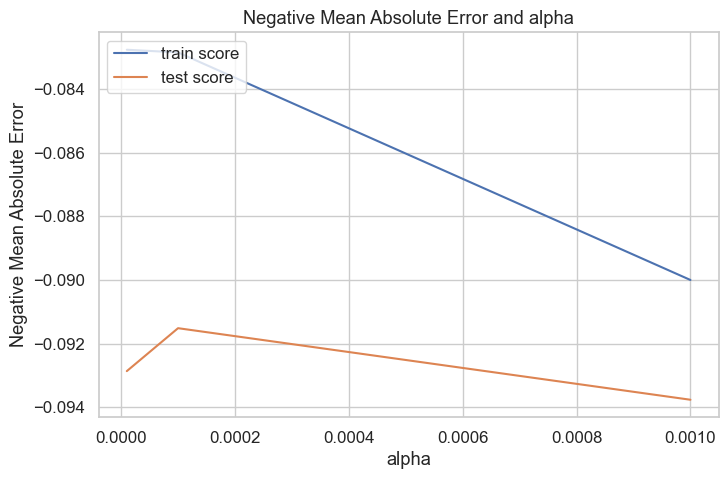

In [99]:
# plotting mean test and train scores with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [100]:
model_cv.best_params_

{'alpha': 0.0001}

In [101]:
# After performing grid search we found the same alpha that ue use before
lasso = Lasso(alpha=0.0001)
lasso.fit(X_train_new,y_train)

y_train_pred = lasso.predict(X_train_new)
y_test_pred = lasso.predict(X_test_new)

print("Lasso Regression train r2:",r2_score(y_true=y_train,y_pred=y_train_pred))
print("Lasso Regression test r2:",r2_score(y_true=y_test,y_pred=y_test_pred))

Lasso Regression train r2: 0.8843757812906754
Lasso Regression test r2: 0.8633379360053544


In [102]:
model_param = list(lasso.coef_)
model_param.insert(0,lasso.intercept_)
cols = X_train_new.columns
cols.insert(0,'const')
lasso_coef = pd.DataFrame(list(zip(cols,model_param,(abs(ele) for ele in model_param))))
lasso_coef.columns = ['Feature','Coef','mod']

In [103]:
lasso_coef.sort_values(by='mod',ascending=False).head(5)

,Feature,Coef,mod
0,LotArea,10.980979,10.980979
12,FullBath,0.889352,0.889352
2,BsmtExposure,0.662933,0.662933
52,Exterior1st_BrkFace,-0.360567,0.360567
1,OverallQual,0.285613,0.285613
